In [21]:
import pyaudio
import wave
import keyboard
import time
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy import signal
import os
import torch
from torch.utils.data import Dataset, DataLoader
import torchaudio


RATE = 44100*2

In [197]:
class SiameseDataset(Dataset):
    def __init__(self, data_dir):
        self.data_dir = data_dir
        self.file_names = os.listdir(data_dir)

    def __len__(self):
        return len(self.file_names)

    def __getitem__(self,index):
        # Get name of file
        file = self.file_names[index]
        file_path = os.path.join(self.data_dir, file)

        # load the audio file
        waveform, sample_rate= torchaudio.load(file_path)

        # Create the spectrogram transform
        transform = torchaudio.transforms.Spectrogram(win_length=64)

        # Apply the transform to the waveform
        spectrogram = transform(waveform)

        # Convert the spectrogram to a numpy array for visualization
        spectrogram = spectrogram.numpy()
        spectrogram = np.squeeze(spectrogram)


        print(file)
        # Plot the spectrogram
        plt.figure(figsize=(10, 4))
        plt.imshow(np.log10(spectrogram), aspect='auto', origin='lower')
        plt.xlabel('Time')
        plt.ylabel('Frequency')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Spectrogram')
        plt.show()
        
        return waveform


In [30]:
i = 0

2023-06-27_12-47-29_l_(13).wav


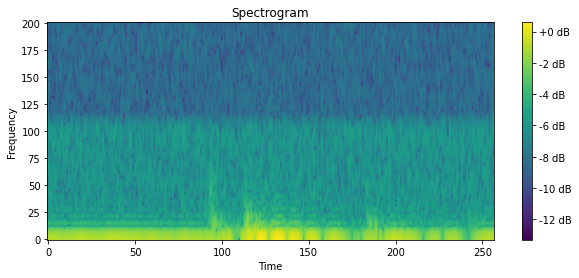

(64, 64)


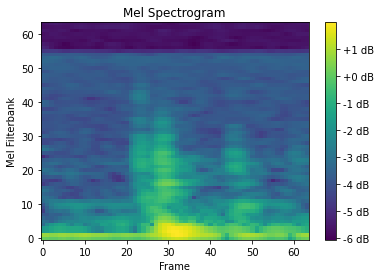

In [240]:
# Create an instance of the dataset
dataset = SiameseDataset("output")
waveform = dataset[i]
i += 1

sample_rate = RATE  # Sample rate of the audio
n_fft = 1024  # Size of the FFT window
hop_length = 130  # Hop length for frame spacing
n_mels = 64  # Number of Mel filterbanks

# Create the MelSpectrogram transform
mel_transform = torchaudio.transforms.MelSpectrogram(
    sample_rate=sample_rate,
    n_fft=n_fft,
    hop_length=hop_length,
    n_mels=n_mels
)
mel_spectrogram = mel_transform(waveform)

# Convert the Mel spectrogram to a NumPy array
mel_spectrogram = mel_spectrogram.numpy()
mel_spectrogram = np.squeeze(mel_spectrogram)
print((mel_spectrogram.shape))

# Visualize the Mel spectrogram
plt.imshow(np.log10(mel_spectrogram), aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Frame')
plt.ylabel('Mel Filterbank')
plt.title('Mel Spectrogram')
plt.show()
